# ASSIGNMENT 1 - Countries of the World EDA

### ABSTRACT

The purpose of this assignment is to perform Exploratory Data Analysis on the given dataset. The data consists of the following parameters:
GDP ($ per capita)
Country
Region
Population
Area (sq. mi.)
Pop. Density (per sq. mi.)
Coastline (coast/area ratio)
Net migration
Infant mortality (per 1000 births)
Literacy (%)
Phones (per 1000)
Arable (%)
Crops (%)
Other (%)
Climate
Birthrate
Deathrate
Agriculture
Industry
Service

At first, functions such as head(), tail(), sample(), describe() have been used to get a feel of the data. 
After this the correlation between the parameters is calculated. Here the Target parameter is the GDP ($ per capita). All the other parameters are the predictors. Upon performing correlation, we will observe that the number of parameters affecting the target variable are considerably low. 
The data set also contains a significant amount of NaN (missing values). Data cleaning has been performed on the dataset in order to get a more accurate value of the correlation between the parameters. Data cleaning has been performed by methods of imputation, wherein, the missing values have been filled in by the mean values of that particular parameter. 




### Acknowledgements

Source: All these data sets are made up of data from the US government. Data from the World Factbook is public domain. The website says "The World Factbook is in the public domain and may be used freely by anyone at anytime without seeking permission." 
[https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html](https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html)

In [202]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [203]:
# importing the dataset
df=pd.read_csv("countries of the world.csv", decimal = ',')

In [204]:
df.sample(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
140,Montserrat,LATIN AMER. & CARIB,9439,102,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN
15,Bahrain,NEAR EAST,698585,665,1050.5,24.21,1.05,17.27,16900.0,89.1,281.3,2.82,5.63,91.55,1.0,17.80,4.14,0.005,0.387,0.608
196,Switzerland,WESTERN EUROPE,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,10.42,0.61,88.97,3.0,9.71,8.49,0.015,0.340,0.645
129,Malta,WESTERN EUROPE,400214,316,1266.5,62.28,2.07,3.89,17700.0,92.8,505.0,28.13,3.13,68.74,NaN,10.22,8.10,0.030,0.230,0.740
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547


Using the df.head() function of pandas library to check the values of the first 5 rows of the dataset. This gives us the insight that the 0th row has values, which will help us in plotting more accurate graphs. 

In [205]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [293]:
df.tail(5) # Last 5 rows of the dataset

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.000000,67.690000,1900.000000,90.700000,26.800000,8.32,0.34,91.34,2.0,28.010000,21.840000,0.179000,0.243000,0.579


The df.info() function is used to get a full summary of the dataset being used. It shows the number of non-null values in each column. It also shows the datatype of each column and the memory used by the dataset. 

In [213]:
print(df.info(null_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

The describe() function of pandas library summarizes the measures of central tendency of the dataset in question. 

In [210]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


The dataframe.count() function returns all the non-null values in the dataset. This function is useful to see which variables need to be cleaned. 

In [211]:
df.count()

Country                               227
Region                                227
Population                            227
Area (sq. mi.)                        227
Pop. Density (per sq. mi.)            227
Coastline (coast/area ratio)          227
Net migration                         224
Infant mortality (per 1000 births)    224
GDP ($ per capita)                    226
Literacy (%)                          209
Phones (per 1000)                     223
Arable (%)                            225
Crops (%)                             225
Other (%)                             225
Climate                               205
Birthrate                             224
Deathrate                             223
Agriculture                           212
Industry                              211
Service                               212
dtype: int64

### Sort countries by GDP per capita

In [17]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


The graph below is a subplot which shows the GDP ($ per capita) vs Country for the top 33 countries of the dataset. 
It is observed here that there is a huge difference between the GDP ($ per capita) for first and second country in the dataset vs the the countries that follow (about 14000).

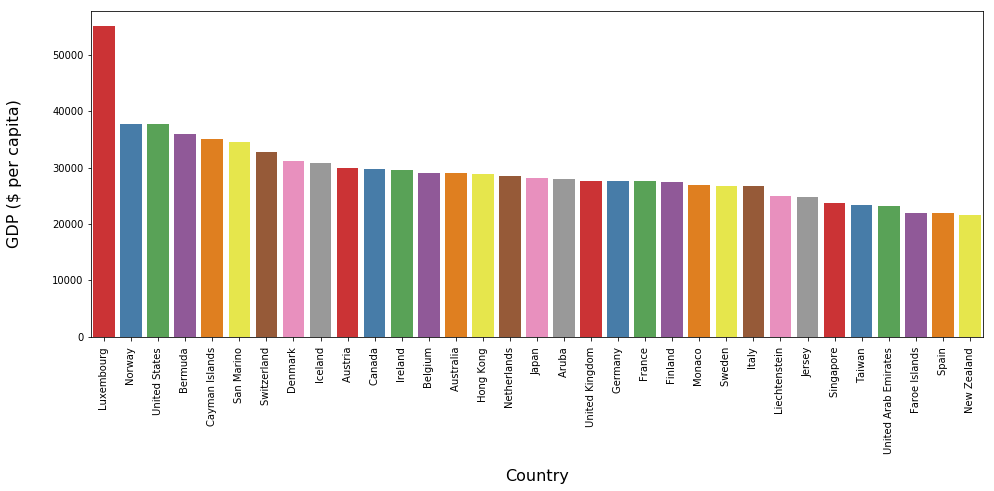

In [80]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

The plot below shows the lowest GDP for 20 countries from the dataset. 

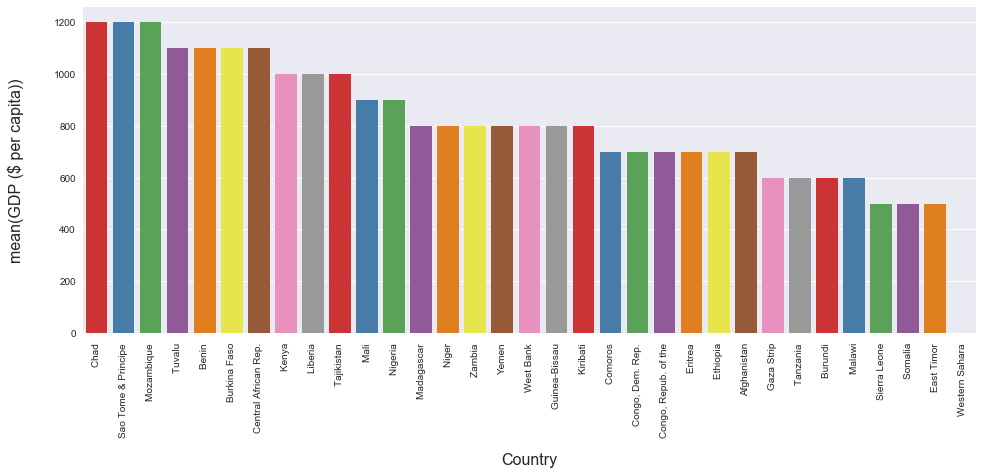

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Below we are checking we are checking the missing values contribute to what percent of the total data of that particular parameter. 

In [81]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Literacy (%),18,7.93
Industry,16,7.05
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32
Other (%),2,0.88
Crops (%),2,0.88


In [9]:
# Checking for null values
df.isnull().values.any() 

True

Below we are checking which parameters have null values and how many null values are there for each parameter.

In [71]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                                0
dtype: int64

In [72]:
df.isnull().sum().sum()

95

#### DATA CLEANING - FILLING UP THE MISSING VALUES

Our dataset has a total of 110 missing values. These missing values can affect the data's predictiveness. Due to this, the missing values can either be filled, deleted or can be imputed with the mean, median or mode. For example, for the Services we have a total of 15 missing values out of 227. These values are replaced by the mean of Services. 

In [238]:
meanSer = np.mean(df.Service)
print(meanSer)

0.5652830188679246


In [239]:
df.Service = df.Service.fillna(meanSer)

Filling the missing values of Climate with the mean value of Climate

In [240]:
meanCli = np.mean(df.Climate)
print(meanCli)

2.1390243902439026


In [241]:
df.Climate = df.Climate.fillna(meanCli)

In [242]:
meanInd = np.mean(df.Industry)
print(meanInd)

0.2827109004739337


In [243]:
df.Industry = df.Industry.fillna(meanInd)

In [244]:
meanL = np.mean(df['Literacy (%)'])
print(meanL)

82.83827751196172


In [245]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(meanL)

In [246]:
meanNM = np.mean(df['Net migration'])
print(meanNM)

0.038125


In [247]:
df['Net migration'] = df['Net migration'].fillna(meanNM)

In [248]:
meanI = np.mean(df['Infant mortality (per 1000 births)'])
print(meanI)

35.50696428571427


In [249]:
df['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].fillna(meanI)

In [250]:
meanP = np.mean(df['Phones (per 1000)'])
print(meanP)

236.06143497757856


In [251]:
df['Phones (per 1000)'] = df['Phones (per 1000)'].fillna(meanP)

In [252]:
meanAg = np.mean(df.Agriculture)
print(meanAg)

0.15084433962264152


In [253]:
df.Agriculture = df.Agriculture.fillna(meanAg)

In [155]:
meanAr = np.mean(df.Birthrate)
print(meanAr)

22.114732142857147


In [254]:
df.Birthrate = df.Birthrate.fillna(meanAr)

In [255]:
meanArable = np.mean(df['Arable (%)'])
print(meanArable)

13.797111111111102


In [256]:
df['Arable (%)'] = df['Arable (%)'].fillna(meanArable)

In [257]:
meanD = np.mean(df.Deathrate)
print(meanD)

9.241345291479824


In [258]:
df.Deathrate = df.Deathrate.fillna(meanD)

In [259]:
meanCrop = np.mean(df['Crops (%)'])
print(meanCrop)

4.564222222222223


In [260]:
df['Crops (%)'] = df['Crops (%)'].fillna(meanCrop)

In [261]:
meanO = np.mean(df['Other (%)'])
print(meanO)

81.63831111111121


In [262]:
df['Other (%)'] = df['Other (%)'].fillna(meanO)

In [263]:
meanGDP = np.mean(df['GDP ($ per capita)'])
print(meanGDP)

9689.823008849558


In [264]:
df['GDP ($ per capita)'] = df['GDP ($ per capita)'].fillna(meanGDP)

We are running the function below to check if all the NaN values have been cleaned/filled or not. 

In [266]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [269]:
df.describe() #checking measures of central tendency post data cleaning.

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856710,35.154225,10026.881258,18.920483,225.965194,12.982573,8.324390,16.069256,0.664484,11.102286,4.945670,0.141843,0.133288,0.160243
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.050000,5600.000000,90.300000,181.600000,10.530000,1.080000,85.380000,2.000000,18.900000,8.170000,0.116000,0.282000,0.565283
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.557111,95.230000,2.319512,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


# Regions

The Barplot below shows the mean GDP ($ per capita) for each region of the dataset. Here we observe that the mean GDP for Western Europe and Northern America is the highest in the dataset. 

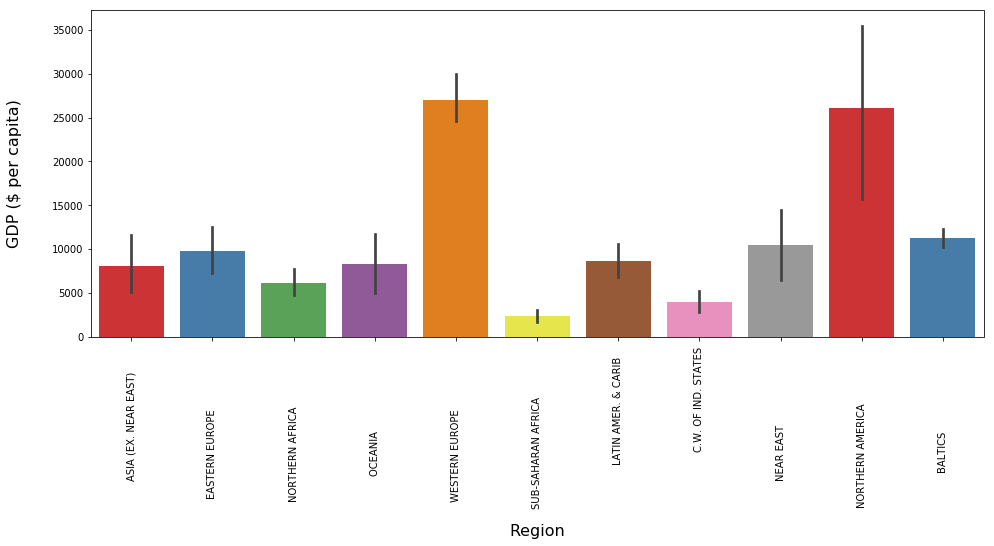

In [270]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Region', y='GDP ($ per capita)', data=df, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [271]:
df.groupby('Region')[['GDP ($ per capita)']].mean()

,GDP ($ per capita)
Region,
ASIA (EX. NEAR EAST),8053.571429
BALTICS,11300.000000
C.W. OF IND. STATES,4000.000000
EASTERN EUROPE,9808.333333
LATIN AMER. & CARIB,8682.222222
NEAR EAST,10456.250000
NORTHERN AFRICA,6164.970501
NORTHERN AMERICA,26100.000000
OCEANIA,8247.619048


In [123]:
df.groupby('Country')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median().sample(5)

,GDP ($ per capita),Literacy (%),Agriculture
Country,,,
Czech Republic,15700.0,99.900000,0.034000
Yemen,800.0,50.200000,0.135000
Nauru,5000.0,82.838278,0.150844
Guadeloupe,8000.0,90.000000,0.150000
Greenland,20000.0,82.838278,0.150844


In [276]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,75.75,0.495000
BALTICS,11400.0,321.40,0.666000
C.W. OF IND. STATES,3450.0,155.35,0.459500
EASTERN EUROPE,9100.0,296.05,0.591000
LATIN AMER. & CARIB,6300.0,225.30,0.615000
NEAR EAST,9250.0,221.50,0.584000
NORTHERN AFRICA,6200.0,125.35,0.425500
NORTHERN AMERICA,29800.0,683.20,0.684000
OCEANIA,5000.0,118.60,0.565283


In [232]:
np.random.seed(sum(map(ord, "distributions")))

In [51]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,0.565283
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,0.565283


## Correlation

In [272]:
df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.022994,-0.039319,-0.043376,-0.030803,0.188201,-0.060741,-0.120575,-0.026439,-0.045075,-0.028354,0.000375,0.099109,-0.080681
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047442,-0.007159,0.072179,0.035784,0.053360,-0.079674,-0.143844,0.138904,-0.082128,-0.066389,0.040049,-0.050380,0.120907,-0.054080
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.177990,-0.144200,0.195751,0.095056,0.280079,-0.080999,-0.031655,0.081844,0.006830,-0.159150,-0.070022,-0.105925,-0.105524,0.187798
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134035,-0.136465,0.049109,0.113651,0.152050,-0.120636,0.341433,-0.079404,-0.031614,-0.075715,-0.161703,-0.028483,-0.185124,0.181939
Net migration,0.000011,0.047442,0.177990,-0.134035,1.000000,-0.025015,0.381969,-0.008506,0.239424,-0.057689,-0.340151,0.222815,-0.014878,-0.066523,0.033605,-0.105674,-0.023679,0.113697
Infant mortality (per 1000 births),0.022994,-0.007159,-0.144200,-0.136465,-0.025015,1.000000,-0.600002,-0.745543,-0.669715,-0.113094,-0.061159,0.123072,-0.342848,0.844968,0.655734,0.697303,0.003510,-0.618623
GDP ($ per capita),-0.039319,0.072179,0.195751,0.049109,0.381969,-0.600002,1.000000,0.497963,0.830549,0.019643,-0.218330,0.097215,0.302404,-0.648808,-0.201148,-0.570735,-0.027935,0.529995
Literacy (%),-0.043376,0.035784,0.095056,0.113651,-0.008506,-0.745543,0.497963,1.000000,0.549913,0.101927,0.038808,-0.102439,0.352569,-0.755196,-0.386376,-0.585492,0.060661,0.465706
Phones (per 1000),-0.030803,0.053360,0.280079,0.152050,0.239424,-0.669715,0.830549,0.549913,1.000000,0.059606,-0.149517,0.029317,0.358574,-0.722329,-0.259708,-0.571704,-0.140516,0.625770
Arable (%),0.188201,-0.079674,-0.080999,-0.120636,-0.057689,-0.113094,0.019643,0.101927,0.059606,1.000000,0.094361,-0.856763,0.353444,-0.183449,0.052991,-0.034080,-0.061923,0.088649


Below a heatmap of the correlation has been plotted for better visualization.

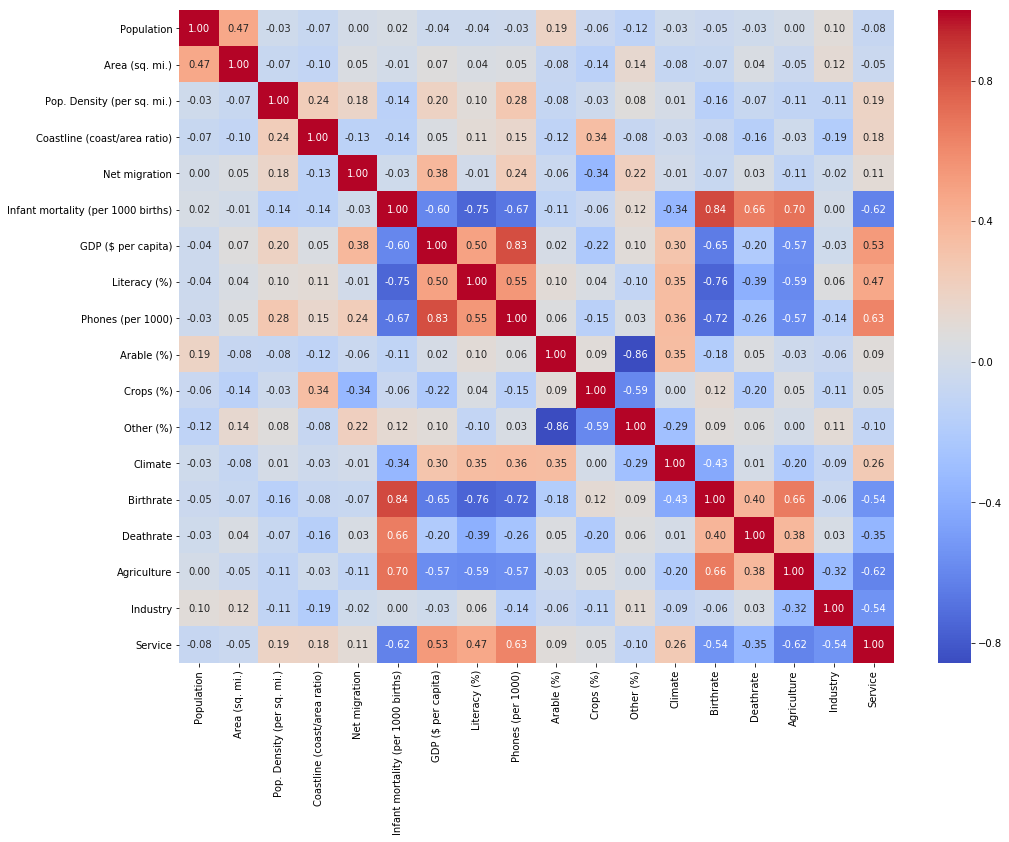

In [176]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

According to the above heatmap, the following parameters(predictors) have the highest absolute correlation with the GDP ($ per capita)
1. Infant Mortality (per 1000 births)
2. Phones (per 1000)
3. Birthrate
4. Agriculture
5. Service

For better visualization, a smaller heatmap of the above attributes is shown below. 

In [282]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Agriculture']]

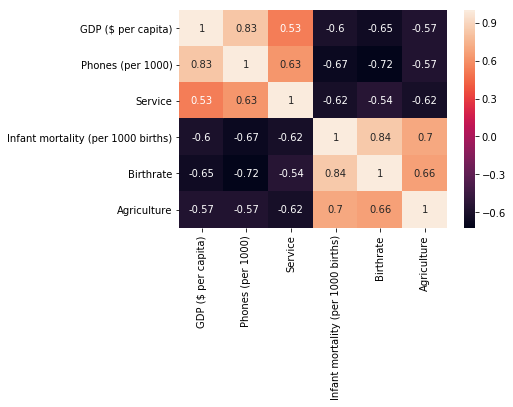

In [283]:
# show corr of the same
sns.heatmap(x.corr(), annot=True)

### Plotting the Linear Relationships for the Most Correlated Parameters (top 9)

In the graphs below, we have plotted the GDP ($ per capita) vs the absolute values of the Top 9 parameters. 

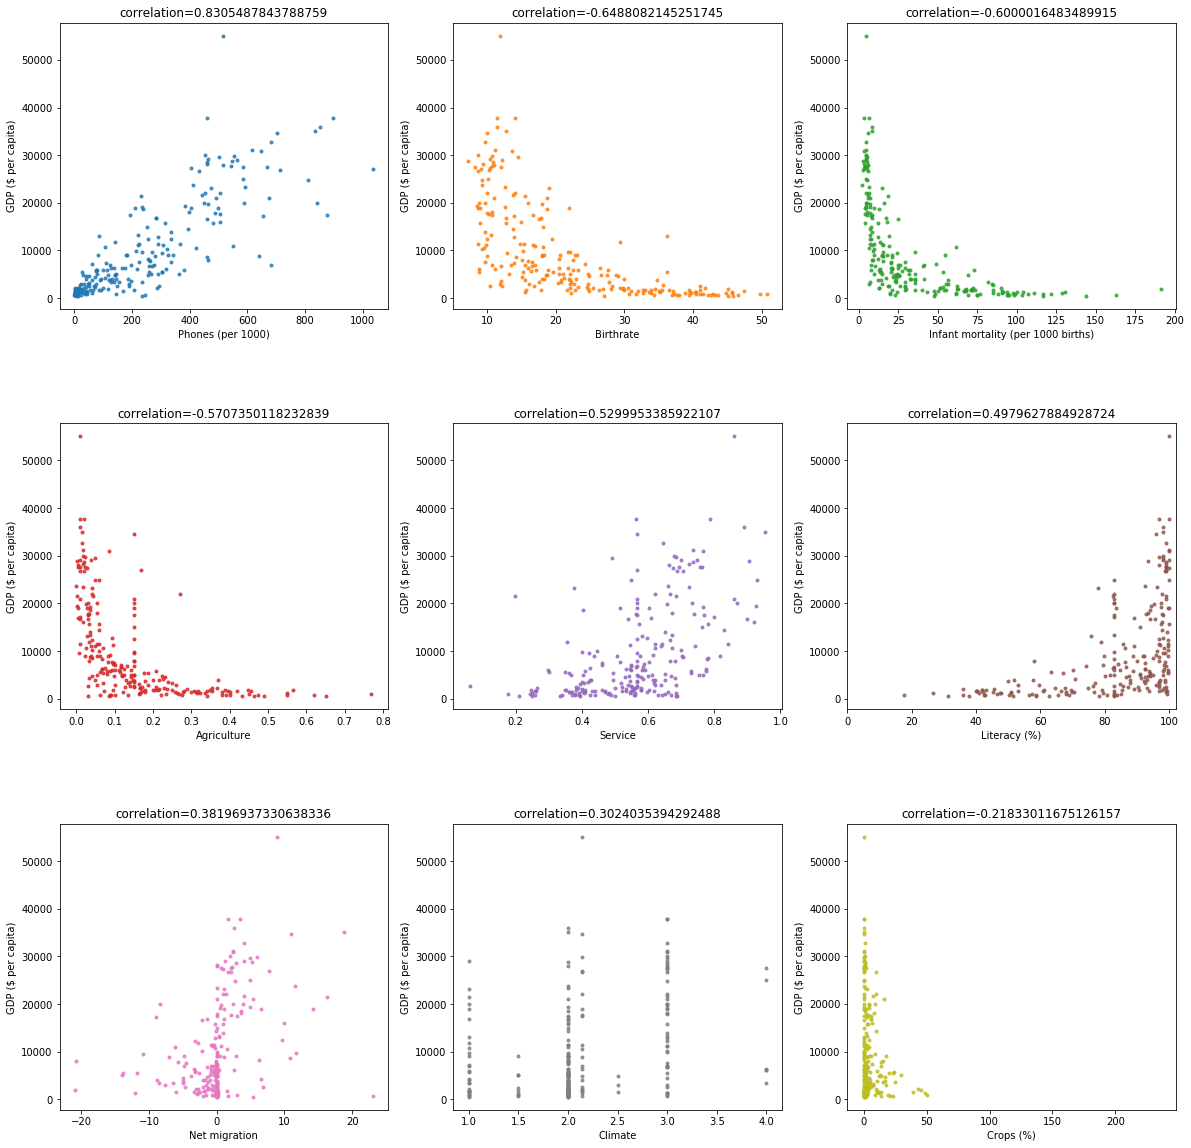

In [315]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Deathrate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [295]:
# choose attributes which shows relation
x = df[['GDP ($ per capita)','Phones (per 1000)','Service', 'Birthrate']]

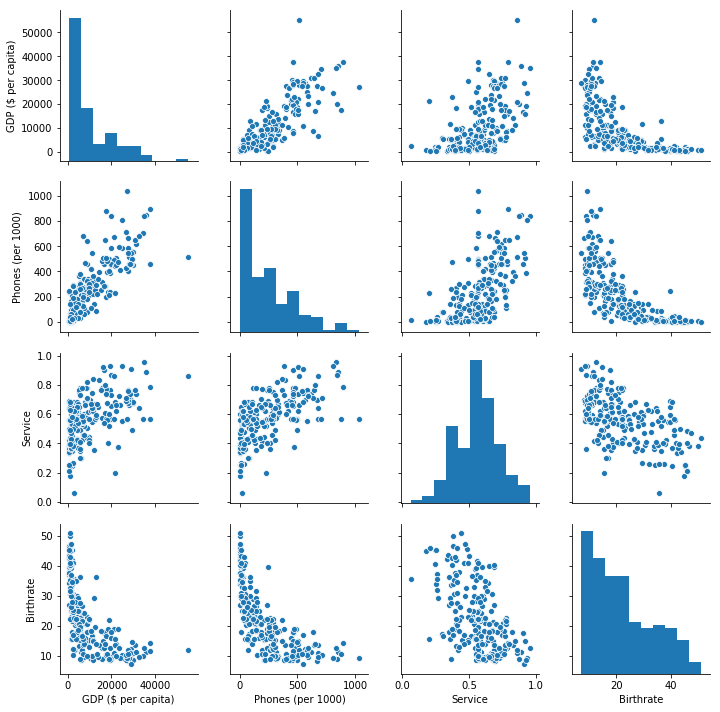

In [297]:
sns.pairplot(x)

According to the graph above, the GDP increases with increase in phones.
The GDP increases with increase in Services
The GDP decreases with increase in Birthrate. 

In [25]:
x.corr()

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.834499,0.550216
Phones (per 1000),0.834499,1.000000,0.683934
Service,0.550216,0.683934,1.000000


The distplot below shows the distribution for GDP ($per capita). The median value lies between 5600 and most of the other values are higher than this value.

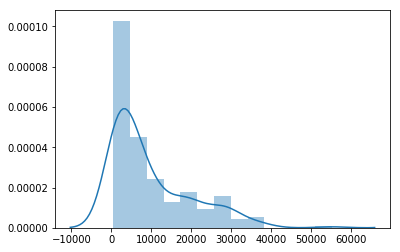

In [308]:
#checking distribution of literacy of the world
sns.distplot(np.array(df['GDP ($ per capita)']))

In [309]:
medGDP = np.median(df['GDP ($ per capita)'])
print('Median =', medGDP)

Median = 5600.0


The graph below shows the distribution of the parameter Phones (per 1000). We observe here that the median value is between 0 and 200. A majority of the values for Phone (per 1000) lie after the median. 

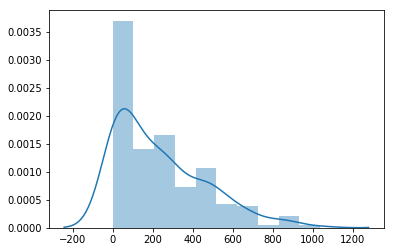

In [310]:
#checking distribution of literacy of the world
sns.distplot(np.array(df['Phones (per 1000)']))

In [311]:
med = np.median(df['Phones (per 1000)'])
print('Median =', med)

Median = 181.6


The graph below shows the distribution of the values for the Services parameter in the dataset. Here we can observe that the median value is around 0.6. Visually, the median seems to be located centrally in the data, which means that roughly half the values and below and half the values are above this value in the dataset.

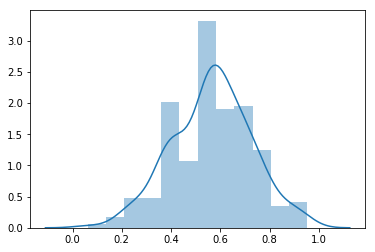

In [195]:
sns.distplot(np.array(df['Service']))

In [313]:
medServ = np.median(df['Service'])
print('Median =', medServ)

Median = 0.5652830188679246


The Boxplot below is a plot of the GDP ($ per capita) of our dataset. It shows that the minimum value according to the distribution is 0, median lies between 0 and 10000. It shows that the maximum value of GDP (approx 55000) is actually treated as a outlier since the rest of the values in the distribution are considerably lesser than 55000. 

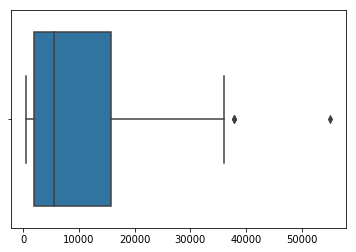

In [234]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

The boxplot below shows the measures of central tendency for Phones (per 1000) parameter of the data. Here, the maximum value according to the distribution lies between 800 and 1000. the actual maximum value has been treated as an outlier since the other values in the distribution are considerably lesser than the maximum value. 75% of the values are lesser than 400. 

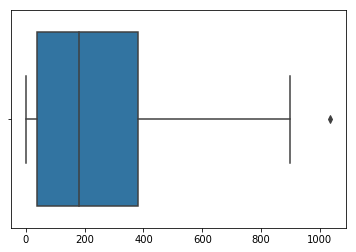

In [185]:
sns.boxplot(np.array(df['Phones (per 1000)']))

From the boxplot below, we can observe that the element with the smallest value is treated as an outlier

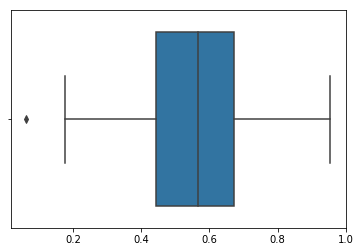

In [186]:
sns.boxplot(np.array(df['Service']))

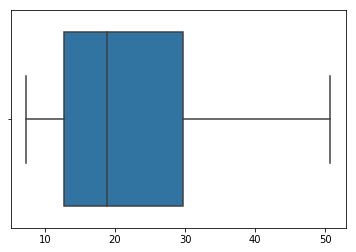

In [314]:
sns.boxplot(np.array(df['Birthrate']))

The graph below shows that the GDP ($ per capita) increases linearly as the Phones (per 1000) increases. The line is the best fit line through the data points that are present in the dataset. We are using lmplot from Seaborn library for the same. 

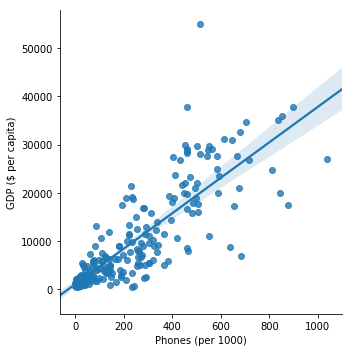

In [318]:
sns.lmplot(x ='Phones (per 1000)', y = 'GDP ($ per capita)', data = df)

## Conclusion

In conclusion, we can summarize that the absolute value of only 5 predictors is considerably correlated to the GDP ($ per capita). 
1. The Phones (per 1000) has the highest value of positive correlation to the GDP which is 0.83. 
2. The Birthrate has the highest value of negative correlation to the GDP which is -0.65; on the other hand,the Population of a  country has a slight negative correlation to the GDP of a nation (-0.04).
3. We can also conclude that Western Europe and Northern America have the highest GDP($  per capita) out of all the given        regions.


## Contributions 

Written by me - 60% 
Code for the data cleaning, few of the graphs
Outside - 40%

##  Citations

Exploratory Data Analysis - 
https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
https://medium.com/python-pandemonium/data-visualization-in-python-line-graph-in-matplotlib-9dfd0016d180

Pandas Library - 
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.isnull.html
https://www.geeksforgeeks.org/python-pandas-dataframe-info/

Understanding the code - 
https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/e/analyzing-data-with-box-plots
https://www.tutorialspoint.com/python_pandas/python_pandas_series.htm
https://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/
https://seaborn.pydata.org/generated/seaborn.barplot.html
https://pythonspot.com/matplotlib-bar-chart/                        

##  License

Copyright 2019 VARADA VINAY DHARMADHIKARI

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.